In [1]:
import pandas as pd 

In [2]:
v2 = pd.read_csv('fatal-police-shootings-data.csv')
v2.head()

,id,date,threat_type,flee_status,armed_with,city,county,state,latitude,longitude,location_precision,name,age,gender,race,race_source,was_mental_illness_related,body_camera,agency_ids
0,3,2015-01-02,point,not,gun,Shelton,Mason,WA,47.246826,-123.121592,not_available,Tim Elliot,53.0,male,A,not_available,True,False,73
1,4,2015-01-02,point,not,gun,Aloha,Washington,OR,45.487421,-122.891696,not_available,Lewis Lee Lembke,47.0,male,W,not_available,False,False,70
2,5,2015-01-03,move,not,unarmed,Wichita,Sedgwick,KS,37.694766,-97.280554,not_available,John Paul Quintero,23.0,male,H,not_available,False,False,238
3,8,2015-01-04,point,not,replica,San Francisco,San Francisco,CA,37.762910,-122.422001,not_available,Matthew Hoffman,32.0,male,W,not_available,True,False,196
4,9,2015-01-04,point,not,other,Evans,Weld,CO,40.383937,-104.692261,not_available,Michael Rodriguez,39.0,male,H,not_available,False,False,473


In [3]:
v2.dtypes

id                              int64
date                           object
threat_type                    object
flee_status                    object
armed_with                     object
city                           object
county                         object
state                          object
latitude                      float64
longitude                     float64
location_precision             object
name                           object
age                           float64
gender                         object
race                           object
race_source                    object
was_mental_illness_related       bool
body_camera                      bool
agency_ids                     object
dtype: object

In [4]:
#dropping unecessary columns
v2.drop(['longitude', 'latitude', 'body_camera', 'flee_status', 'threat_type', 'location_precision', 'race_source', 'county'], axis=1, inplace=True)
v2.head()

,id,date,armed_with,city,state,name,age,gender,race,was_mental_illness_related,agency_ids
0,3,2015-01-02,gun,Shelton,WA,Tim Elliot,53.0,male,A,True,73
1,4,2015-01-02,gun,Aloha,OR,Lewis Lee Lembke,47.0,male,W,False,70
2,5,2015-01-03,unarmed,Wichita,KS,John Paul Quintero,23.0,male,H,False,238
3,8,2015-01-04,replica,San Francisco,CA,Matthew Hoffman,32.0,male,W,True,196
4,9,2015-01-04,other,Evans,CO,Michael Rodriguez,39.0,male,H,False,473


In [5]:
v2

,id,date,armed_with,city,state,name,age,gender,race,was_mental_illness_related,agency_ids
0,3,2015-01-02,gun,Shelton,WA,Tim Elliot,53.0,male,A,True,73
1,4,2015-01-02,gun,Aloha,OR,Lewis Lee Lembke,47.0,male,W,False,70
2,5,2015-01-03,unarmed,Wichita,KS,John Paul Quintero,23.0,male,H,False,238
3,8,2015-01-04,replica,San Francisco,CA,Matthew Hoffman,32.0,male,W,True,196
4,9,2015-01-04,other,Evans,CO,Michael Rodriguez,39.0,male,H,False,473
...,...,...,...,...,...,...,...,...,...,...,...
8405,9147,2023-04-22,gun,Mesquite,TX,NaN,NaN,male,NaN,False,NaN
8406,9149,2023-04-22,gun,West Jordan,UT,NaN,NaN,male,NaN,False,751
8407,9144,2023-04-23,undetermined,Pineville,LA,NaN,NaN,NaN,NaN,False,21677
8408,9153,2023-04-23,unknown,Shreveport,LA,Joseph Dewayne Taylor,33.0,male,B,False,772


In [6]:
v2.dtypes

id                              int64
date                           object
armed_with                     object
city                           object
state                          object
name                           object
age                           float64
gender                         object
race                           object
was_mental_illness_related       bool
agency_ids                     object
dtype: object

In [7]:
#check for data consistency
v2['gender'].unique()

array(['male', 'female', nan, 'non-binary'], dtype=object)

In [8]:
v2['armed_with'].unique()

array(['gun', 'unarmed', 'replica', 'other', 'knife', nan, 'blunt_object',
       'vehicle', 'undetermined', 'other;gun', 'unknown',
       'blunt_object;blunt_object', 'gun;knife', 'knife;blunt_object',
       'vehicle;gun', 'gun;vehicle', 'replica;vehicle',
       'blunt_object;knife', 'knife;vehicle', 'vehicle;knife;other',
       'replica;knife', 'other;blunt_object;knife'], dtype=object)

In [9]:
#adjust the date column
v2['id'] = v2['id'].astype('object')
v2['age'] = v2['age'].astype('Int64')
v2['gender'] = v2['gender'].astype('category')
v2['race'] = v2['race'].astype('category')
v2['was_mental_illness_related'] = v2['was_mental_illness_related'].astype('category')
v2['date'] = v2['date'].astype('datetime64[ns]')
v2.dtypes

id                                    object
date                          datetime64[ns]
armed_with                            object
city                                  object
state                                 object
name                                  object
age                                    Int64
gender                              category
race                                category
was_mental_illness_related          category
agency_ids                            object
dtype: object

In [10]:
#dropping NaN values and cleaning
v2.dropna()
v2 = v2.dropna(subset=['age'])
v2 = v2.dropna(subset=['name'])
v2 = v2.rename(columns={"was_mental_illness_related": "mental_illness"})
v2

,id,date,armed_with,city,state,name,age,gender,race,mental_illness,agency_ids
0,3,2015-01-02,gun,Shelton,WA,Tim Elliot,53,male,A,True,73
1,4,2015-01-02,gun,Aloha,OR,Lewis Lee Lembke,47,male,W,False,70
2,5,2015-01-03,unarmed,Wichita,KS,John Paul Quintero,23,male,H,False,238
3,8,2015-01-04,replica,San Francisco,CA,Matthew Hoffman,32,male,W,True,196
4,9,2015-01-04,other,Evans,CO,Michael Rodriguez,39,male,H,False,473
...,...,...,...,...,...,...,...,...,...,...,...
8398,9151,2023-04-19,gun,Kansas City,MO,Reginald E. Byers Jr.,43,male,B,False,201
8399,9152,2023-04-20,gun,Indianapolis,IN,Daniel Yefter Ghebrehiwet,46,male,B,False,13886
8400,9154,2023-04-20,knife,NaN,TX,Dimitri Amarillas,25,male,NaN,False,3574
8408,9153,2023-04-23,unknown,Shreveport,LA,Joseph Dewayne Taylor,33,male,B,False,772


In [11]:
#set the index
v2 = v2.set_index('id').sort_index(ascending=True)
v2

,date,armed_with,city,state,name,age,gender,race,mental_illness,agency_ids
id,,,,,,,,,,
3,2015-01-02,gun,Shelton,WA,Tim Elliot,53,male,A,True,73
4,2015-01-02,gun,Aloha,OR,Lewis Lee Lembke,47,male,W,False,70
5,2015-01-03,unarmed,Wichita,KS,John Paul Quintero,23,male,H,False,238
8,2015-01-04,replica,San Francisco,CA,Matthew Hoffman,32,male,W,True,196
9,2015-01-04,other,Evans,CO,Michael Rodriguez,39,male,H,False,473
...,...,...,...,...,...,...,...,...,...,...
9143,2023-04-24,gun,Weldon Spring,MO,Tracy Hayes,40,male,W,False,27596
9151,2023-04-19,gun,Kansas City,MO,Reginald E. Byers Jr.,43,male,B,False,201
9152,2023-04-20,gun,Indianapolis,IN,Daniel Yefter Ghebrehiwet,46,male,B,False,13886


In [12]:
#number 1
name = v2.loc[1694, 'name']
name

'Philando Castile'

In [13]:
#number 2
minnesota_shootings = v2[v2['state'] == 'MN']
minnesota_names = minnesota_shootings['name']
minnesota_names

id
49           Marcus Golden
60      Quincy Reed Reindl
212        Justin Tolkinen
324          Raymond Kmetz
454             Sam Holmes
               ...        
8710        Howard Johnson
8744     Brent A. Alsleben
8975       Zachary Shogren
9009    Okwan Rahmier Sims
9132          Bryan Nygard
Name: name, Length: 91, dtype: object

In [14]:
#number 3
shootings_by_race = v2['race'].value_counts()
shootings_by_race

race
W      3606
B      1884
H      1254
A       139
N       108
O        20
B;H       1
Name: count, dtype: int64

In [15]:
#number 4
black_shootings = v2[v2['race'] == 'B'].shape[0]
total_shootings = v2.shape[0]
number4 = black_shootings / total_shootings
number4

0.2435367114788004

In [16]:
#number 5
fatal_shooting_state = v2['state'].value_counts()
fatal_shooting_state

state
CA    1050
TX     675
FL     483
AZ     354
GA     313
CO     262
OH     234
TN     227
NC     224
MO     209
WA     208
OK     206
PA     164
IL     162
NM     159
LA     156
IN     155
AL     150
VA     146
NY     139
KY     138
OR     131
NV     130
SC     129
MI     126
WI     118
MD     110
AR     109
UT      92
MN      91
MS      90
NJ      89
KS      81
WV      74
ID      65
MA      53
AK      53
MT      50
IA      49
NE      41
HI      38
ME      34
DC      25
WY      24
CT      23
NH      23
SD      20
ND      18
DE      18
VT      13
RI       5
Name: count, dtype: int64

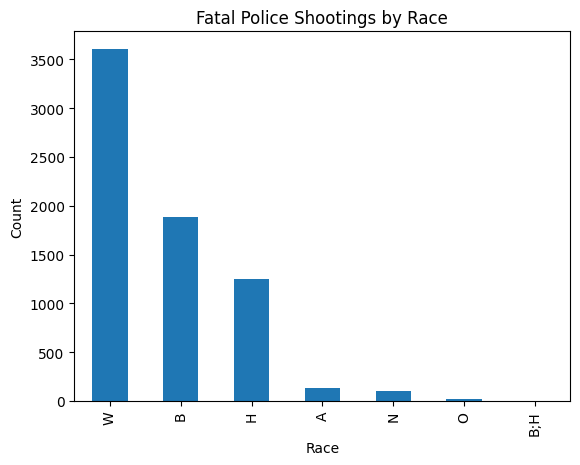

In [17]:
#number 6 a
import matplotlib.pyplot as plt
shootings_by_race.plot.bar()
plt.title('Fatal Police Shootings by Race')
plt.xlabel('Race')
plt.ylabel('Count')
plt.show()

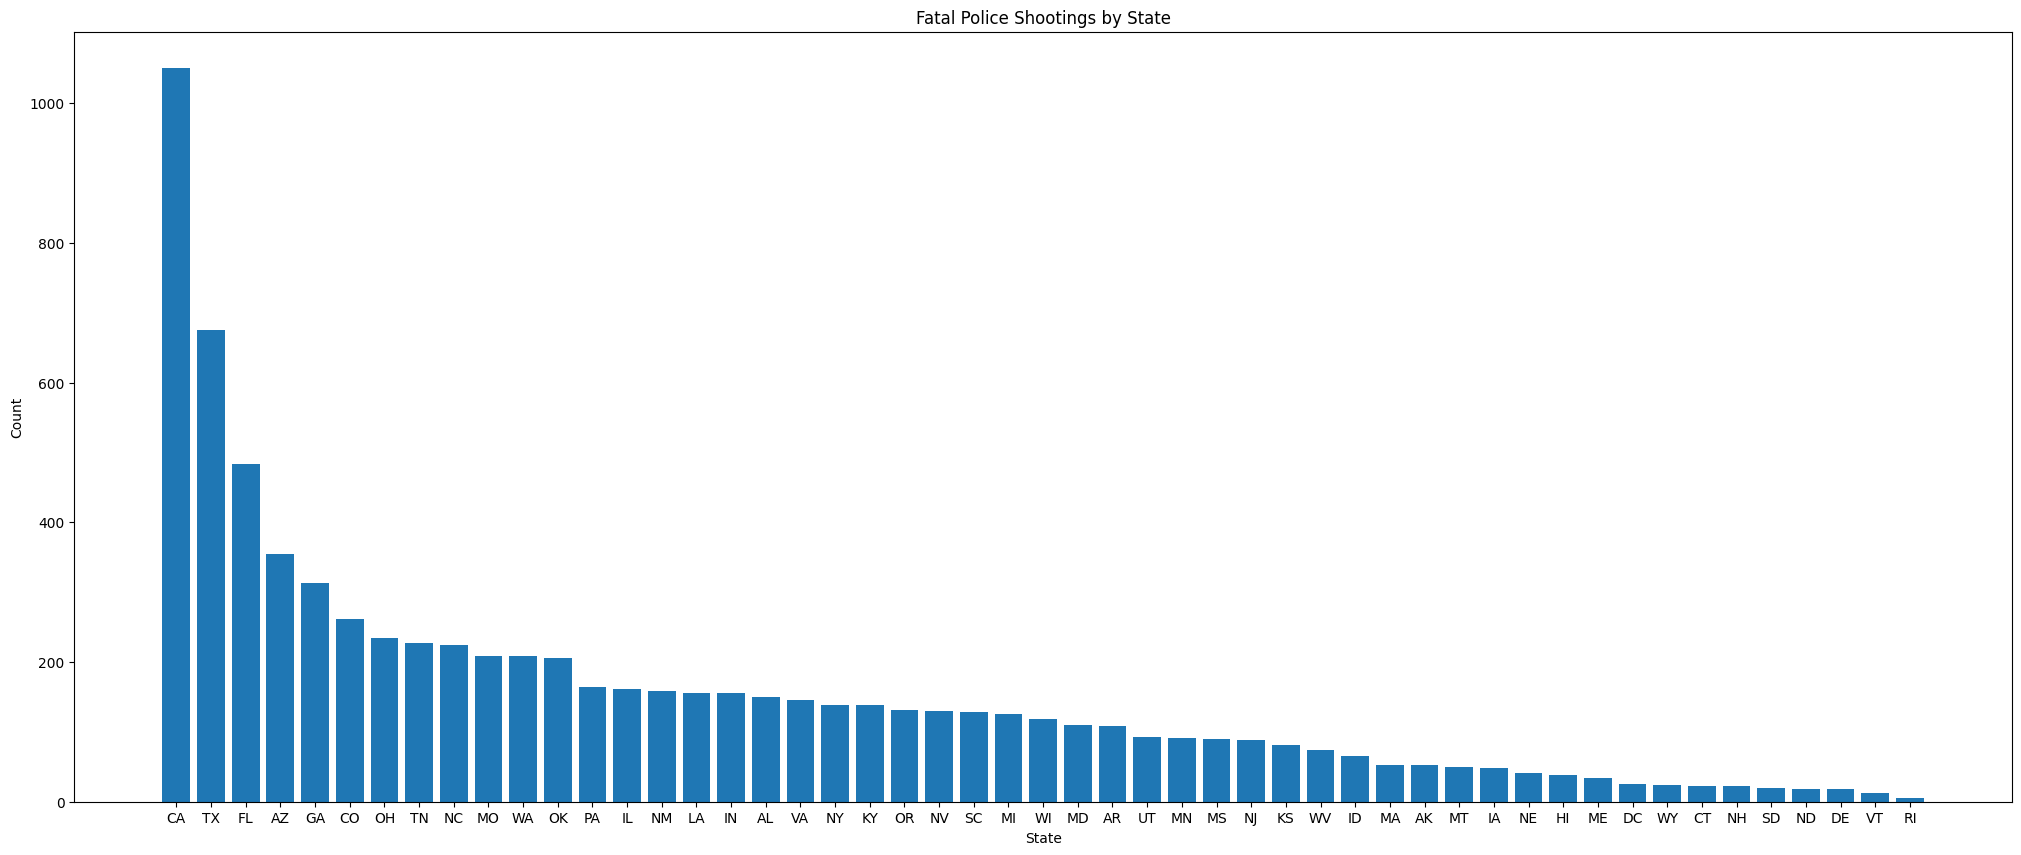

In [18]:
#number 6 b
plt.figure(figsize=(25,10))
plt.bar(fatal_shooting_state.index, fatal_shooting_state.values)
plt.xlabel('State')
plt.ylabel('Count')
plt.title('Fatal Police Shootings by State')
plt.show()

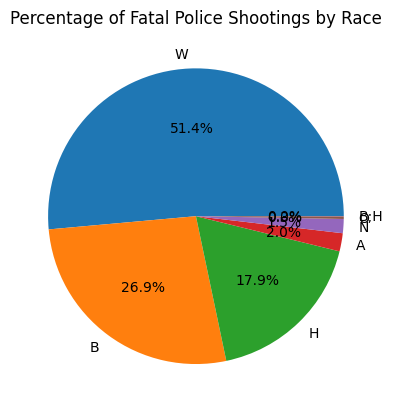

In [19]:
#bonus
plt.pie(shootings_by_race.values, labels=shootings_by_race.index, autopct='%1.1f%%')
plt.title('Percentage of Fatal Police Shootings by Race')
plt.show()

In [20]:
#Filter the dataframe to only contain entries for fatal police shootings where the subjectwas unarmed.
unarmed_shootings = v2[v2['armed_with'] == 'unarmed'].copy()
unarmed_shootings

,date,armed_with,city,state,name,age,gender,race,mental_illness,agency_ids
id,,,,,,,,,,
5,2015-01-03,unarmed,Wichita,KS,John Paul Quintero,23,male,H,False,238
16,2015-01-06,unarmed,Burlington,IA,Autumn Steele,34,female,W,False,287
36,2015-01-08,unarmed,Strong,AR,Artago Damon Howard,36,male,B,False,249
114,2015-02-02,unarmed,Hummelstown,PA,David Kassick,59,male,W,False,303
116,2015-02-04,unarmed,Tallahassee,FL,Jeremy Lett,28,male,B,False,311
...,...,...,...,...,...,...,...,...,...,...
8941,2023-01-31,unarmed,Jackson,OH,William E. Beach Jr.,31,male,NaN,False,1449
8973,2023-02-22,unarmed,Tysons,VA,Timothy McCree Johnson,37,male,B,False,1612
8981,2023-02-09,unarmed,Redding,CA,David Lawrence Couch III,31,male,NaN,True,266


In [21]:
#Create a pivot table, grouping on race for your reduced dataframe
pivot_unarmed_by_race = unarmed_shootings.pivot_table(index='race', aggfunc='size').sort_values(ascending=False)
pivot_unarmed_by_race

race
W      197
B      154
H       91
A        8
N        7
O        5
B;H      0
dtype: int64

In [22]:
#Print the fraction of unarmed fatal police shootings with a black subject.  
black_unarmed = unarmed_shootings[(unarmed_shootings['race'] == 'B')]
fraction_black_unarmed = len(black_unarmed) / len(unarmed_shootings)
fraction_black_unarmed

0.3188405797101449

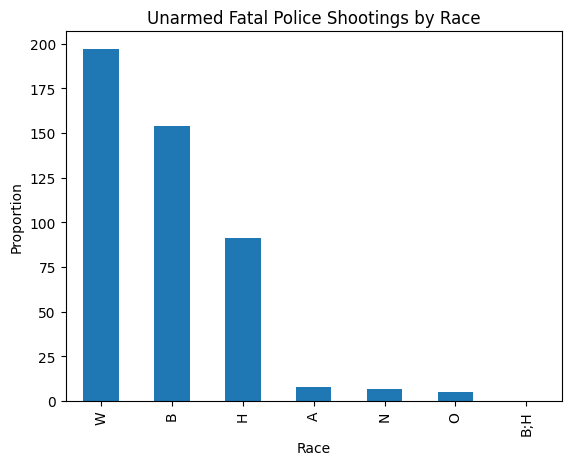

In [23]:
#Generate a bar-plot of the unarmed fatal police shootings by race.
pivot_unarmed_by_race.plot(kind='bar')
plt.title('Unarmed Fatal Police Shootings by Race')
plt.xlabel('Race')
plt.ylabel('Proportion')
plt.show()

In [24]:
#Add a new column to the original (cleaned, but not just the unarmed data) datasetthat extracts the year from the date column
v2['year'] = pd.DatetimeIndex(v2['date']).year
v2

,date,armed_with,city,state,name,age,gender,race,mental_illness,agency_ids,year
id,,,,,,,,,,,
3,2015-01-02,gun,Shelton,WA,Tim Elliot,53,male,A,True,73,2015
4,2015-01-02,gun,Aloha,OR,Lewis Lee Lembke,47,male,W,False,70,2015
5,2015-01-03,unarmed,Wichita,KS,John Paul Quintero,23,male,H,False,238,2015
8,2015-01-04,replica,San Francisco,CA,Matthew Hoffman,32,male,W,True,196,2015
9,2015-01-04,other,Evans,CO,Michael Rodriguez,39,male,H,False,473,2015
...,...,...,...,...,...,...,...,...,...,...,...
9143,2023-04-24,gun,Weldon Spring,MO,Tracy Hayes,40,male,W,False,27596,2023
9151,2023-04-19,gun,Kansas City,MO,Reginald E. Byers Jr.,43,male,B,False,201,2023
9152,2023-04-20,gun,Indianapolis,IN,Daniel Yefter Ghebrehiwet,46,male,B,False,13886,2023


In [25]:
#one dataframe should include shootings inMinnesota,
minnesota = v2[v2['state'] == 'MN']
minnesota.head()

,date,armed_with,city,state,name,age,gender,race,mental_illness,agency_ids,year
id,,,,,,,,,,,
49,2015-01-14,NaN,St. Paul,MN,Marcus Golden,24,male,B,False,63,2015
60,2015-01-15,gun,Bloomington,MN,Quincy Reed Reindl,24,male,W,True,139,2015
212,2015-03-16,gun,St. Paul,MN,Justin Tolkinen,28,male,W,True,63,2015
324,2015-01-26,gun,New Hope,MN,Raymond Kmetz,68,male,W,True,1953;109,2015
454,2015-05-08,NaN,Fridley,MN,Sam Holmes,31,male,B,False,476,2015


In [26]:
#one should include shootings in Illinois
illinois = v2[v2['state'] == 'IL']
illinois.head()

,date,armed_with,city,state,name,age,gender,race,mental_illness,agency_ids,year
id,,,,,,,,,,,
42,2015-01-11,gun,Arcola,IL,Tommy Smith,39,male,W,True,290,2015
196,2015-03-02,gun,Joilet,IL,Shaquille Barrow,20,male,B,False,244,2015
286,2015-04-02,gun,Rock Island,IL,Darrin Langford,32,male,B,False,40,2015
288,2015-04-02,gun,Metropolis,IL,Donald Hicks,63,male,W,True,41;42;43,2015
296,2015-04-04,gun,Zion,IL,Justus Howell,17,male,B,False,75,2015


In [27]:
#Create a pivot table from each dataframe, pivoting on the year.
minnesota_year = pd.pivot_table(data=minnesota, index='year', aggfunc='count', values='name')
minnesota_year

,name
year,
2015,12
2016,14
2017,10
2018,12
2019,11
2020,8
2021,12
2022,9
2023,3


In [28]:
#Create a pivot table from each dataframe, pivoting on the year.
illinois_year = pd.pivot_table(data=illinois, index='year', aggfunc='count', values='name')
illinois_year

,name
year,
2015,21
2016,25
2017,19
2018,20
2019,12
2020,13
2021,28
2022,19
2023,5


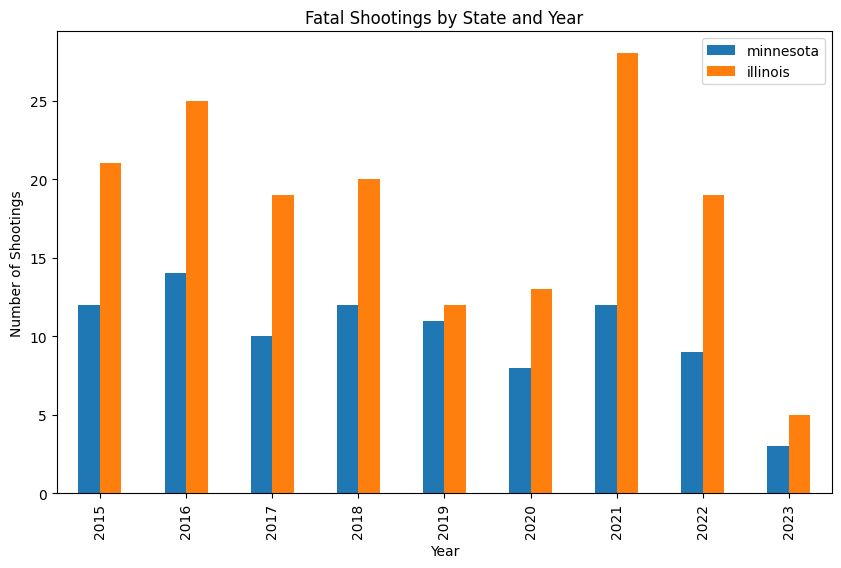

In [29]:
#For each state, generate a plot of how the fatal shootings have changed over the yearsincluded in the dataset.
merged_df = pd.merge(minnesota_year, illinois_year, on='year')
merged_df.columns = ['minnesota', 'illinois']
merged_df.plot(kind='bar', figsize=(10,6))
plt.title('Fatal Shootings by State and Year')
plt.xlabel('Year')
plt.ylabel('Number of Shootings')
plt.legend()
plt.show()

In [30]:
#task 4
import requests

url_il= 'https://api.usa.gov/crime/fbi/cde/estimate/state/IL?from=2015&to=2020&API_KEY=iiHnOKfno2Mgkt5AynpvPpUQTEyxE77jo1RU8PIv'
url_mn= 'https://api.usa.gov/crime/fbi/cde/estimate/state/MN?from=2015&to=2020&API_KEY=iiHnOKfno2Mgkt5AynpvPpUQTEyxE77jo1RU8PIv'

data_il= requests.get(url_il).json()
data_mn= requests.get(url_mn).json()

df_il = pd.DataFrame(data_il)
df_mn = pd.DataFrame(data_mn)

#df_il_mn = pd.concat([df_il, df_mn])
#df_il_mn

In [31]:
df_il

,state_id,state_abbr,year,population,violent_crime,homicide,rape_legacy,rape_revised,robbery,aggravated_assault,property_crime,burglary,larceny,motor_vehicle_theft,arson
0,18,IL,2015,12839047,49755,754,3602,4926,15056,29019,256962,46846,192424,17692,2361
1,18,IL,2016,12835726,56054,1061,3713,5003,17829,32161,263256,48193,195196,19867,2547
2,18,IL,2017,12786196,55777,983,None,5424,17731,31639,255108,43355,190860,20893,1812
3,18,IL,2018,12723071,52343,902,None,6106,14251,31084,246679,39317,187517,19845,1360
4,18,IL,2019,12667017,52601,851,None,6161,12660,32929,235033,34789,181225,19019,1311
5,18,IL,2020,12587530,53612,1151,None,5090,12261,35110,196287,31020,143935,21332,1591


In [32]:
#cleaning
df_il.drop(['state_id', 'rape_legacy', 'property_crime', 'burglary', 'larceny', 'motor_vehicle_theft', 'arson'], axis=1, inplace=True)
df_mn.drop(['state_id', 'rape_legacy', 'property_crime', 'burglary', 'larceny', 'motor_vehicle_theft', 'arson'], axis=1, inplace=True)

In [33]:
#changing types
df_il['population'] = pd.to_numeric(df_il['population'])
df_il['violent_crime'] = pd.to_numeric(df_il['violent_crime'])
df_il['homicide'] = pd.to_numeric(df_il['homicide'])
df_il['rape_revised'] = pd.to_numeric(df_il['rape_revised'])
df_il['robbery'] = pd.to_numeric(df_il['robbery'])
df_il['aggravated_assault'] = pd.to_numeric(df_il['aggravated_assault'])

df_mn['population'] = pd.to_numeric(df_mn['population'])
df_mn['violent_crime'] = pd.to_numeric(df_mn['violent_crime'])
df_mn['homicide'] = pd.to_numeric(df_mn['homicide'])
df_mn['rape_revised'] = pd.to_numeric(df_mn['rape_revised'])
df_mn['robbery'] = pd.to_numeric(df_mn['robbery'])
df_mn['aggravated_assault'] = pd.to_numeric(df_mn['aggravated_assault'])

In [34]:
df_il

,state_abbr,year,population,violent_crime,homicide,rape_revised,robbery,aggravated_assault
0,IL,2015,12839047,49755,754,4926,15056,29019
1,IL,2016,12835726,56054,1061,5003,17829,32161
2,IL,2017,12786196,55777,983,5424,17731,31639
3,IL,2018,12723071,52343,902,6106,14251,31084
4,IL,2019,12667017,52601,851,6161,12660,32929
5,IL,2020,12587530,53612,1151,5090,12261,35110


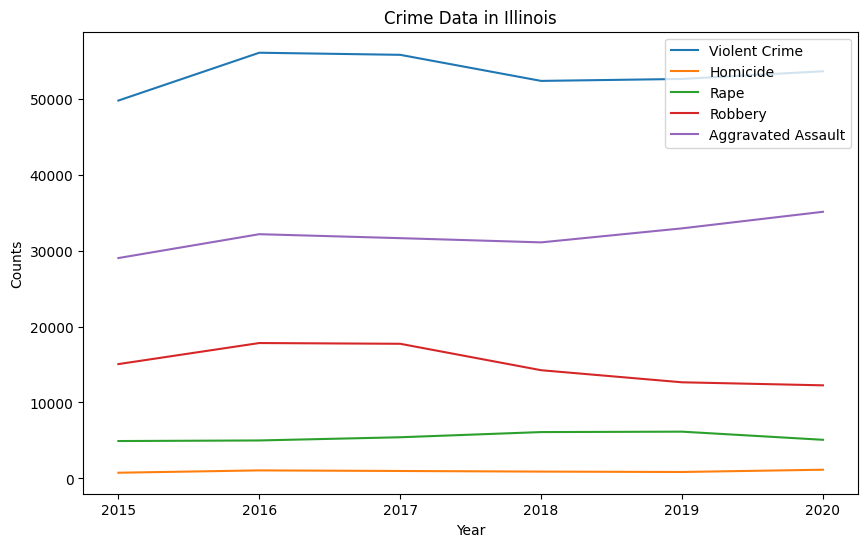

In [35]:
x = df_il['year']
y1 = df_il['violent_crime']
y2 = df_il['homicide']
y3 = df_il['rape_revised']
y4 = df_il['robbery']
y5 = df_il['aggravated_assault']

fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(x, y1, label='Violent Crime')
ax.plot(x, y2, label='Homicide')
ax.plot(x, y3, label='Rape')
ax.plot(x, y4, label='Robbery')
ax.plot(x, y5, label='Aggravated Assault')

ax.set_xlabel('Year')
ax.set_ylabel('Counts')
ax.set_title('Crime Data in Illinois')
ax.legend()
plt.show()

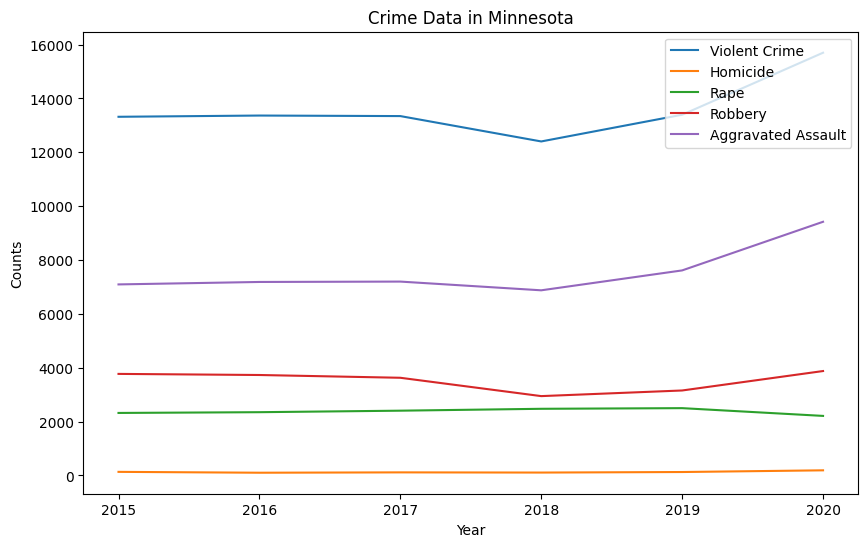

In [36]:
x = df_mn['year']
y1 = df_mn['violent_crime']
y2 = df_mn['homicide']
y3 = df_mn['rape_revised']
y4 = df_mn['robbery']
y5 = df_mn['aggravated_assault']

fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(x, y1, label='Violent Crime')
ax.plot(x, y2, label='Homicide')
ax.plot(x, y3, label='Rape')
ax.plot(x, y4, label='Robbery')
ax.plot(x, y5, label='Aggravated Assault')

ax.set_xlabel('Year')
ax.set_ylabel('Counts')
ax.set_title('Crime Data in Minnesota')
ax.legend()
plt.show()

In [37]:
#Make a copy (not just a reference) of the dataframe with your combined data
df_combined_il = pd.merge(df_il, illinois, on='year')
df_combined_il.drop(['state_abbr'], axis=1, inplace=True)
df_combined_il

,year,population,violent_crime,homicide,rape_revised,robbery,aggravated_assault,date,armed_with,city,state,name,age,gender,race,mental_illness,agency_ids
0,2015,12839047,49755,754,4926,15056,29019,2015-01-11,gun,Arcola,IL,Tommy Smith,39,male,W,True,290
1,2015,12839047,49755,754,4926,15056,29019,2015-03-02,gun,Joilet,IL,Shaquille Barrow,20,male,B,False,244
2,2015,12839047,49755,754,4926,15056,29019,2015-04-02,gun,Rock Island,IL,Darrin Langford,32,male,B,False,40
3,2015,12839047,49755,754,4926,15056,29019,2015-04-02,gun,Metropolis,IL,Donald Hicks,63,male,W,True,41;42;43
4,2015,12839047,49755,754,4926,15056,29019,2015-04-04,gun,Zion,IL,Justus Howell,17,male,B,False,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,2020,12587530,53612,1151,5090,12261,35110,2020-10-16,gun,Rock Island,IL,Akbar Muhammad Eaddy,27,male,B,False,40
106,2020,12587530,53612,1151,5090,12261,35110,2020-10-20,unarmed,Waukegan,IL,Marcellis Stinnette,19,male,B,False,2392
107,2020,12587530,53612,1151,5090,12261,35110,2020-10-23,gun,Chicago,IL,Marc Nevarez,25,male,H,False,265
108,2020,12587530,53612,1151,5090,12261,35110,2020-11-04,replica,Lewistown,IL,Justin Hammack,26,male,W,True,2930;2933


In [38]:
#Make a copy (not just a reference) of the dataframe with your combined data
df_combined_mn = pd.merge(df_mn, minnesota, on='year')
df_combined_mn.drop(['state_abbr'], axis=1, inplace=True)
df_combined_mn

,year,population,violent_crime,homicide,rape_revised,robbery,aggravated_assault,date,armed_with,city,state,name,age,gender,race,mental_illness,agency_ids
0,2015,5482435,13319,133,2321,3771,7094,2015-01-14,NaN,St. Paul,MN,Marcus Golden,24,male,B,False,63
1,2015,5482435,13319,133,2321,3771,7094,2015-01-15,gun,Bloomington,MN,Quincy Reed Reindl,24,male,W,True,139
2,2015,5482435,13319,133,2321,3771,7094,2015-03-16,gun,St. Paul,MN,Justin Tolkinen,28,male,W,True,63
3,2015,5482435,13319,133,2321,3771,7094,2015-01-26,gun,New Hope,MN,Raymond Kmetz,68,male,W,True,1953;109
4,2015,5482435,13319,133,2321,3771,7094,2015-05-08,NaN,Fridley,MN,Sam Holmes,31,male,B,False,476
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,2020,5657342,15698,190,2211,3877,9420,2020-07-13,gun,Chaska,MN,Arlan Kaleb Schultz,31,male,W,False,2241
63,2020,5657342,15698,190,2211,3877,9420,2020-09-29,gun,St. Cloud,MN,Kirby Joseph Michael Hengel,27,male,W,False,2908
64,2020,5657342,15698,190,2211,3877,9420,2020-10-09,unarmed,Pine County,MN,Anthony Michael Legato,25,male,W,False,2913
65,2020,5657342,15698,190,2211,3877,9420,2020-12-05,knife,Mountain Iron,MN,Estavon Elioff,19,male,W,True,2974


In [39]:
divided_mn = df_combined_mn.copy()

divided_mn['violent_crime'] = df_combined_mn['violent_crime'] / df_combined_mn.loc[df_combined_mn['year'] == 2015, 'violent_crime'].values[0]
divided_mn['homicide'] = df_combined_mn['homicide'] / df_combined_mn.loc[df_combined_mn['year'] == 2015, 'homicide'].values[0]
divided_mn['rape_revised'] = df_combined_mn['rape_revised'] / df_combined_mn.loc[df_combined_mn['year'] == 2015, 'rape_revised'].values[0]
divided_mn['robbery'] = df_combined_mn['robbery'] / df_combined_mn.loc[df_combined_mn['year'] == 2015, 'robbery'].values[0]
divided_mn['aggravated_assault'] = df_combined_mn['aggravated_assault'] / df_combined_mn.loc[df_combined_mn['year'] == 2015, 'aggravated_assault'].values[0]

pivot_table_mn = pd.pivot_table(divided_mn, values=['violent_crime', 'homicide', 'rape_revised', 'robbery', 'aggravated_assault'], index=['year'])

pivot_table_mn

,aggravated_assault,homicide,rape_revised,robbery,violent_crime
year,,,,,
2015,1.000000,1.000000,1.000000,1.000000,1.000000
2016,1.012828,0.759398,1.012064,0.989128,1.003454
2017,1.014801,0.857143,1.036191,0.961814,1.001952
2018,0.969129,0.804511,1.066351,0.781225,0.931226
2019,1.073301,0.954887,1.076691,0.836648,1.005706
2020,1.327883,1.428571,0.952607,1.028109,1.178617


In [40]:
divided_il = df_combined_il.copy()

divided_il['violent_crime'] = divided_il['violent_crime'] / divided_il.loc[divided_il['year'] == 2015, 'violent_crime'].values[0]
divided_il['homicide'] = divided_il['homicide'] / divided_il.loc[divided_il['year'] == 2015, 'homicide'].values[0]
divided_il['rape_revised'] = divided_il['rape_revised'] / divided_il.loc[divided_il['year'] == 2015, 'rape_revised'].values[0]
divided_il['robbery'] = divided_il['robbery'] / divided_il.loc[divided_il['year'] == 2015, 'robbery'].values[0]
divided_il['aggravated_assault'] = divided_il['aggravated_assault'] / divided_il.loc[divided_il['year'] == 2015, 'aggravated_assault'].values[0]

pivot_table_il = pd.pivot_table(divided_il, values=['violent_crime', 'homicide', 'rape_revised', 'robbery', 'aggravated_assault'], index=['year'])

pivot_table_il

,aggravated_assault,homicide,rape_revised,robbery,violent_crime
year,,,,,
2015,1.000000,1.000000,1.000000,1.000000,1.000000
2016,1.108274,1.407162,1.015631,1.184179,1.126600
2017,1.090286,1.303714,1.101096,1.177670,1.121033
2018,1.071160,1.196286,1.239545,0.946533,1.052015
2019,1.134739,1.128647,1.250711,0.840861,1.057200
2020,1.209897,1.526525,1.033293,0.814360,1.077520


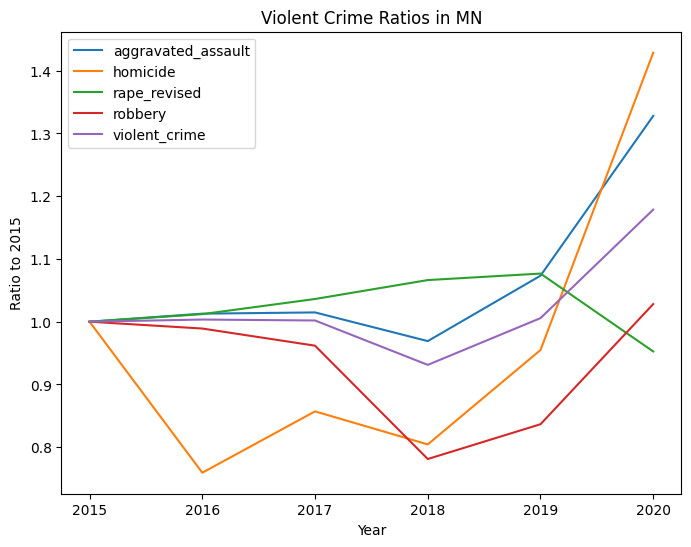

In [41]:
#plot mn
fig, ax = plt.subplots(figsize=(8,6))

# plot each column as a separate line
for col in pivot_table_mn.columns:
    ax.plot(pivot_table_mn.index, pivot_table_mn[col], label=col)

# set x and y axis labels and legend
ax.set_xlabel('Year')
ax.set_ylabel('Ratio to 2015')
ax.set_title('Violent Crime Ratios in MN')
ax.legend()

plt.show()

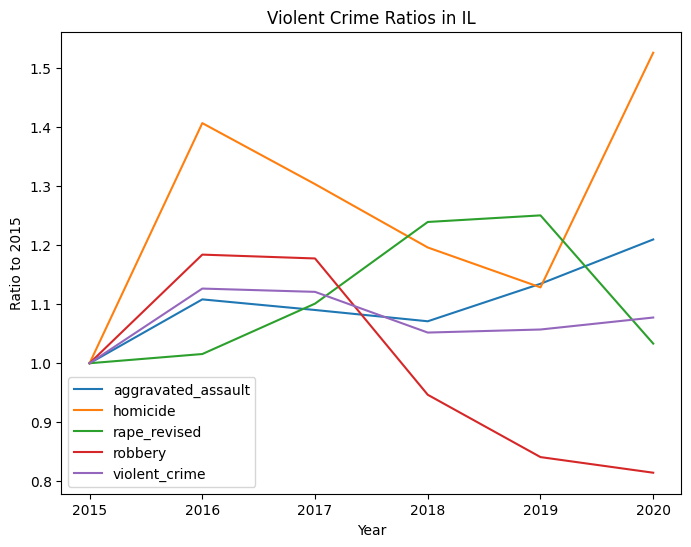

In [42]:
#plot il
fig, ax = plt.subplots(figsize=(8,6))

# plot each column as a separate line
for col in pivot_table_il.columns:
    ax.plot(pivot_table_il.index, pivot_table_il[col], label=col)

# set x and y axis labels and legend
ax.set_xlabel('Year')
ax.set_ylabel('Ratio to 2015')
ax.set_title('Violent Crime Ratios in IL')
ax.legend()

plt.show()

In [43]:
divided_il

,year,population,violent_crime,homicide,rape_revised,robbery,aggravated_assault,date,armed_with,city,state,name,age,gender,race,mental_illness,agency_ids
0,2015,12839047,1.00000,1.000000,1.000000,1.00000,1.000000,2015-01-11,gun,Arcola,IL,Tommy Smith,39,male,W,True,290
1,2015,12839047,1.00000,1.000000,1.000000,1.00000,1.000000,2015-03-02,gun,Joilet,IL,Shaquille Barrow,20,male,B,False,244
2,2015,12839047,1.00000,1.000000,1.000000,1.00000,1.000000,2015-04-02,gun,Rock Island,IL,Darrin Langford,32,male,B,False,40
3,2015,12839047,1.00000,1.000000,1.000000,1.00000,1.000000,2015-04-02,gun,Metropolis,IL,Donald Hicks,63,male,W,True,41;42;43
4,2015,12839047,1.00000,1.000000,1.000000,1.00000,1.000000,2015-04-04,gun,Zion,IL,Justus Howell,17,male,B,False,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,2020,12587530,1.07752,1.526525,1.033293,0.81436,1.209897,2020-10-16,gun,Rock Island,IL,Akbar Muhammad Eaddy,27,male,B,False,40
106,2020,12587530,1.07752,1.526525,1.033293,0.81436,1.209897,2020-10-20,unarmed,Waukegan,IL,Marcellis Stinnette,19,male,B,False,2392
107,2020,12587530,1.07752,1.526525,1.033293,0.81436,1.209897,2020-10-23,gun,Chicago,IL,Marc Nevarez,25,male,H,False,265
108,2020,12587530,1.07752,1.526525,1.033293,0.81436,1.209897,2020-11-04,replica,Lewistown,IL,Justin Hammack,26,male,W,True,2930;2933


In [44]:
df_combined_il

,year,population,violent_crime,homicide,rape_revised,robbery,aggravated_assault,date,armed_with,city,state,name,age,gender,race,mental_illness,agency_ids
0,2015,12839047,49755,754,4926,15056,29019,2015-01-11,gun,Arcola,IL,Tommy Smith,39,male,W,True,290
1,2015,12839047,49755,754,4926,15056,29019,2015-03-02,gun,Joilet,IL,Shaquille Barrow,20,male,B,False,244
2,2015,12839047,49755,754,4926,15056,29019,2015-04-02,gun,Rock Island,IL,Darrin Langford,32,male,B,False,40
3,2015,12839047,49755,754,4926,15056,29019,2015-04-02,gun,Metropolis,IL,Donald Hicks,63,male,W,True,41;42;43
4,2015,12839047,49755,754,4926,15056,29019,2015-04-04,gun,Zion,IL,Justus Howell,17,male,B,False,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,2020,12587530,53612,1151,5090,12261,35110,2020-10-16,gun,Rock Island,IL,Akbar Muhammad Eaddy,27,male,B,False,40
106,2020,12587530,53612,1151,5090,12261,35110,2020-10-20,unarmed,Waukegan,IL,Marcellis Stinnette,19,male,B,False,2392
107,2020,12587530,53612,1151,5090,12261,35110,2020-10-23,gun,Chicago,IL,Marc Nevarez,25,male,H,False,265
108,2020,12587530,53612,1151,5090,12261,35110,2020-11-04,replica,Lewistown,IL,Justin Hammack,26,male,W,True,2930;2933
